In [4]:
# for interactive plot only, run before matplotlib import
%matplotlib ipympl

# Simulation configuration

In [26]:
import os
import dynamic_sound as ds
import matplotlib.pyplot as plt

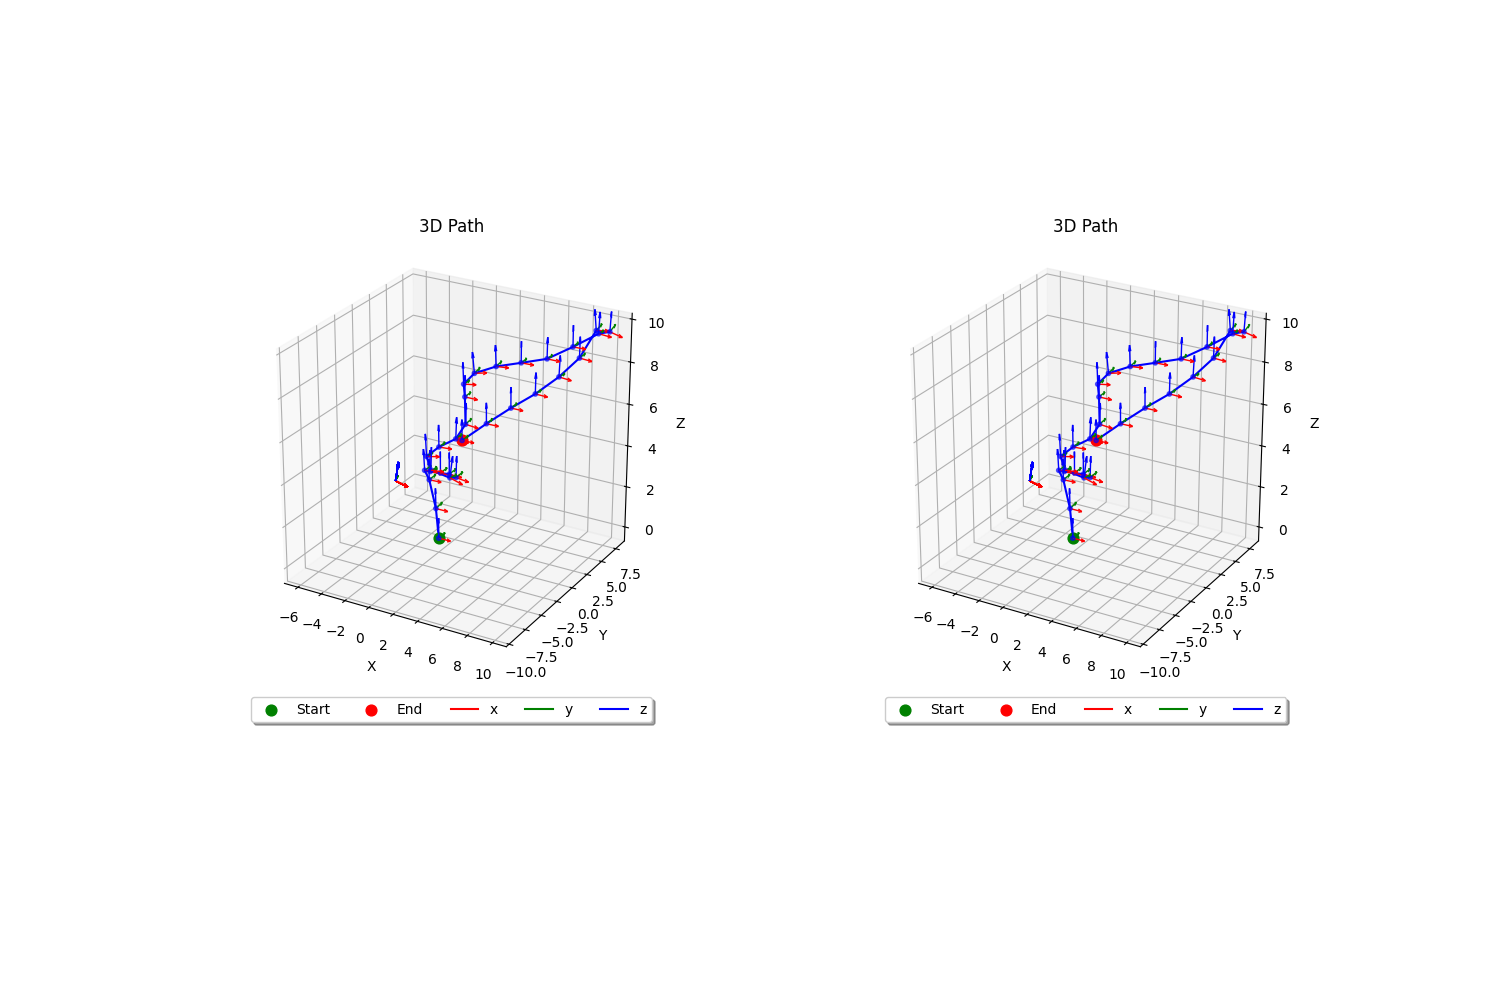

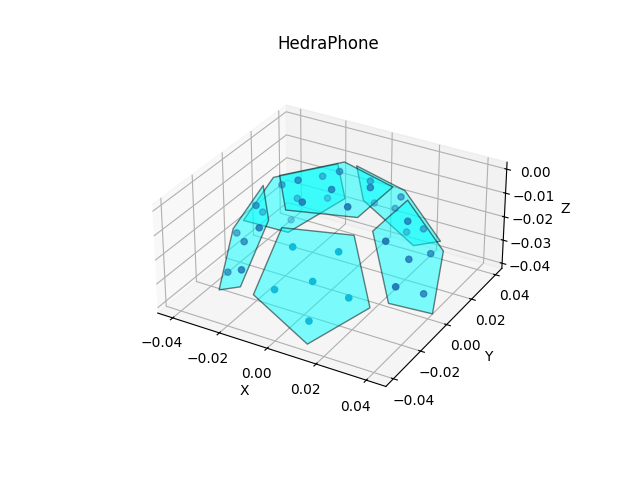

In [27]:
src_folder = r"../airsim/data/run1/converted"
drone_path = ds.Path(file=os.path.join(src_folder, "drone_path.csv"))
microphone_path = ds.Path(file=os.path.join(src_folder, "camera_path.csv"))
drone_sound = r"tests/resources/sounds/flying_drone.wav"

# path interpolation
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
drone_path.plot_path_3d(show=False, ax=ax1)
drone_path.plot_quaternion_directions(scale=1.0, show=False, ax=ax1, legend=False)
microphone_path.plot_quaternion_directions(scale=1.0, show=False, ax=ax1)
#drone_path.interpolate_path(50)
drone_path.plot_path_3d(show=False, ax=ax2)
drone_path.plot_quaternion_directions(scale=1.0, show=False, ax=ax2, legend=False)
microphone_path.plot_quaternion_directions(scale=1.0, show=False, ax=ax2)
plt.show()


sim_sample_rate = 48_000

# simulation environment
sim = ds.Simulation(
    temperature=20,
    pressure=1,
    relative_humidity=50
)

# microphone
microphone = ds.microphones.Hedraphone_v2("simulation_sound.wav", sample_rate=sim_sample_rate)
sim.add_microphone(path=microphone_path, microphone=microphone)
microphone.plot_figure(show=True)

# source
source_file = ds.sources.AudioFile(filename=drone_sound, sample_rate=48_000, gain_db=10.0, loop=True)
sim.add_source(
    path=drone_path,
    source=source_file
)

# reflection
drone_path.positions[:,3] = -drone_path.positions[:,3]
sim.add_source(
    path=drone_path,
    source=source_file
)

# Simulation run

In [ ]:
sim.run()

  1%|▏                          | 10105/1392000 [01:50<5:19:23, 72.11it/s]

# Simulation results visualization

In [9]:
import matplotlib.pyplot as plt
import librosa
import IPython.display as ipd
import numpy as np

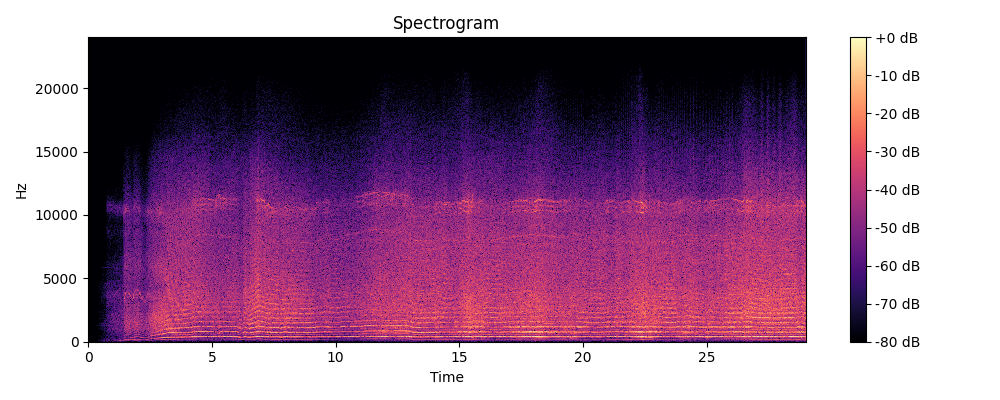

In [15]:
signal, sr = librosa.load("simulation_sound.wav", sr=None, mono=False)

if signal.ndim == 1:  # if single channel reshape to a common format (n_channels, n_samples)
    signal = signal.reshape(1, -1)
    
ipd.display(ipd.Audio(signal[0], rate=sr))

D = librosa.stft(signal[0])
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure(figsize=(10, 4))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.tight_layout()
plt.show()